In [104]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

# The following topics will be discussed within this notebook:

    1- Loading the dataset and looking through the data in TensorFlow 
    2- Simple data normalisation 
    3- Creating a simple MLP for classification 
    4- Model compiling 
    5- Model fitting 
    6- Visualisation of objective functions 
    7- Using the model for prediction

the Fashion MNIST dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels)



Downloading Fashion MNIST from kERAS. note that the train test split has already been done in within the downloaded dataset

In [2]:
fmnist_data= keras.datasets.fashion_mnist

In [3]:
fmnist_data

<module 'keras.api._v2.keras.datasets.fashion_mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/fashion_mnist/__init__.py'>

In [4]:
fmnist_data.load_data()

4422102/4422102 [==============================] - 0s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

Note that within fmnist_data the train and test data has already been seperated

In [55]:
(x_train, y_train), (x_test, y_test)= fmnist_data.load_data()

In [56]:
x_train.shape # 60000 pictures with 28*28 pixels. For each picture, there are 28 rols and 28 cols

(60000, 28, 28)

In [57]:
y_train.shape # the actual class/ category of each picture

(60000,)

In [58]:
x_train[0:2]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [59]:
y_train[0:2] # image with index 0 is class 9 (a t-shirt for example) and image with index 1 is class 0

array([9, 0], dtype=uint8)

In [60]:
x_test.shape

(10000, 28, 28)

In [61]:
y_test.shape

(10000,)

In [62]:
x_test[0:2]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [63]:
y_test[0:2]

array([9, 2], dtype=uint8)

In [64]:
x_train[1,]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  0,   0,   0,   0, 200, 222, 209, 203, 215, 200,   0,  70,  98,
          0, 103,  59,  68,  71,  49,   0, 219, 206, 214, 210, 250,  38,
          0,   0],
       [  0,   0,   0,   0, 247, 218, 212, 210, 215, 214,   0, 254, 243,
        139, 255, 174, 251, 255, 205,   0, 215, 217, 214, 208, 220,  95,
          0,   0],
       [  0,   0,   0,  45, 226, 214, 214, 215, 224, 205,   0,  42,  35,
         60,  16,  17,  12,  13,  70,   0, 189, 216, 212, 206, 212, 156,
          0,   0],
       [  0,   0,   0, 164, 235, 214, 211, 220, 216, 201,  52,  71,  89,
         94,  83,  78,  70,  76,  92,  87, 206, 207, 222, 213, 219, 208,
          0,   0],
       [  0,   0,   0, 106, 187, 223, 237, 248, 211, 198, 252, 250, 248,
        245, 248, 252, 253, 250, 252, 239, 201, 212, 225, 215, 193, 113,
          0,   0],
       [  0,   0,   0,   0,   0,  17,  54, 159, 222, 193, 208, 192, 197,
        200, 200, 200, 200, 201, 203, 195, 210, 165,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  47, 225, 192, 214, 203, 206,
        204, 204, 205, 206, 204, 212, 197, 218, 107,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   1,   6,   0,  46, 212, 195, 212, 202, 206,
        205, 204, 205, 206, 204, 212, 200, 218,  91,   0,   3,   1,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,  11, 197, 199, 205, 202, 205,
        206, 204, 205, 207, 204, 205, 205, 218,  77,   0,   5,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   3,   0,   2, 191, 198, 201, 205, 206,
        205, 205, 206, 209, 206, 199, 209, 219,  74,   0,   5,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0, 188, 197, 200, 207, 207,
        204, 207, 207, 210, 208, 198, 207, 221,  72,   0,   4,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0, 215, 198, 203, 206, 208,
        205, 207, 207, 210, 208, 200, 202, 222,  75,   0,   4,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 212, 198, 209, 206, 209,
        206, 208, 207, 211, 206, 205, 198, 221,  80,   0,   3,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 204, 201, 205, 208, 207,
        205, 211, 205, 210, 210, 209, 195, 221,  96,   0,   3,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 202, 201, 205, 209, 207,
        205, 213, 206, 210, 209, 210, 194, 217, 105,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 204, 204, 205, 208, 207,
        205, 215, 207, 210, 208, 211, 193, 213, 115,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 204, 207, 207, 208, 206,
        206, 215, 210, 210, 207, 212, 195, 210, 118,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 198, 208, 208, 208, 204,
        207, 212, 212, 210, 207, 211, 196, 207, 121,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   

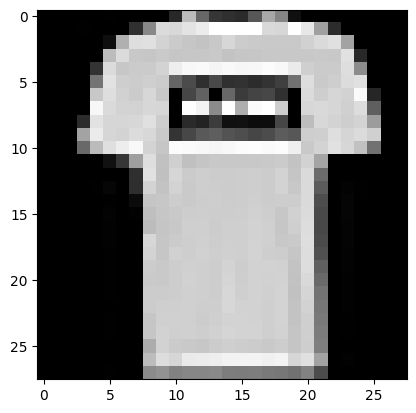

In [65]:
plt.imshow(x_train[1,], cmap= "gray")

In [66]:
x_train[2,]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,  22, 118,  24,   0,
          0,   0,   0,   0,  48,  88,   5,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  12, 100, 212, 205, 185,
        179, 173, 186, 193, 221, 142,  85,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  85,  76, 199, 225,
        248, 255, 238, 226, 157,  68,  80,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  91,  69,  91, 201,
        218, 225, 209, 158,  61,  93,  72,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  79,  89,  61,  59,
         87, 108,  75,  56,  76,  97,  73,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  75,  89,  80,  80,
         67,  63,  73,  83,  80,  96,  72,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  77,  88,  77,  80,
         83,  83,  83,  83,  81,  95,  76,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  89,  96,  80,  83,
         81,  84,  85,  85,  85,  97,  84,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  93,  97,  81,  85,
         84,  85,  87,  88,  84,  99,  87,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  95,  87,  84,  87,
         88,  85,  87,  87,  84,  92,  87,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  97,  87,  87,  85,
         88,  87,  87,  87,  88,  85, 107,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  17, 100,  88,  87,  87,
         88,  87,  87,  85,  89,  77, 118,   8,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  10,  93,  87,  87,  87,
         87,  87,  88,  87,  89,  80, 103,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   9,  96,  87,  87,  87,
         87,  87,  88,  87,  88,  87, 103,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  12,  96,  85,  87,  87,
         87,  85,  87,  87,  88,  89, 100,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  20,  95,  84,  88,  85,
         87,  88,  88,  88,  89,  88,  99,   8,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  21,  96,  85,  87,  85,
         88,  88,  88,  88,  89,  89,  99,  10,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  24,  96,  85,  87,  85,
         87,  88,  88,  89,  88,  91, 102,  14,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  25,  93,  84,  88,  87,
         87,  87,  87,  87,  89,  91, 103,  29,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  95,  85,  88,  88,
         87,  87,  87,  87,  89,  88, 102,  37,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  34,  96,  88,  87,  87,
         87,  87,  87,  87,  85,  85,  97,  38,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  40,  96,  87,  85,  87,
         87,  87,  87,  87,  85,  84,  92,  49,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  46,  95,  83,  84,  87,
         87,  87,  87,  87,  87,  84,  87,  84,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  72,  95,  85,  84,  85,
         88,  87,  87,  89,  87,  85,  83,  63,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

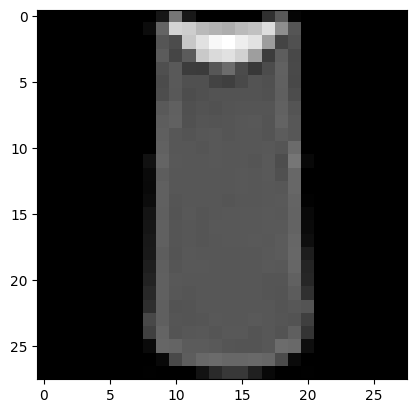

In [67]:
plt.imshow(x_train[2,], cmap= "gray")

# **Data normalisation**

In [68]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 155, 236, 207, 178, 107, 156, 161, 109,  64,  23,  77, 130,
         72,  15],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88,
        172,  66],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   0,
        200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196,
        229,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245,
        173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        193, 228, 218, 213, 198, 180, 212, 210, 211, 213, 223, 220, 243,
        202,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,  12,
        219, 220, 212, 218, 192, 169, 227, 208, 218, 224, 212, 226, 197,
        209,  52],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  99,
        244, 222, 220, 218, 203, 198, 221, 215, 213, 222, 220, 245, 119,
        167,  56],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,  55,
        236, 228, 230, 228, 240, 232, 213, 218, 223, 234, 217, 217, 209,
         92,   0],
       [  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237,
        226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,
         77,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,  62, 145, 204, 228,
        207, 213, 221, 218, 208, 211, 218, 224, 223, 219, 215, 224, 244,
        159,   0],
       [  0,   0,   0,   0,  18,  44,  82, 107, 189, 228, 220, 222, 217,
        226, 200, 205, 211, 230, 224, 234, 176, 188, 250, 248, 233, 238,
        215,   0],
       [  0,  57, 187, 208, 224, 221, 224, 208, 204, 214, 208, 209, 200,
        159, 245, 193, 206, 223, 255, 255, 221, 234, 221, 211, 220, 232,
        246,   0],
       [  3, 202, 228, 224, 221, 211, 211, 214, 205, 205, 205, 220, 240,
         80, 150, 255, 229, 221, 188, 154, 191, 210, 204, 209, 222, 228,
        225,   0],
       [ 98, 233, 198, 210, 222, 229, 229, 234, 249, 220, 194, 215, 217,
        241,  65,  73, 106, 117, 168, 219, 221, 215, 217, 223, 223, 224,
        229,  29],
       [ 75, 204, 212, 204, 193, 205, 211, 225, 216, 185, 197, 206, 198,
        213, 240, 195, 227, 245, 239, 223, 218, 212, 209, 222, 220, 221,
        230,  67],
       [ 48, 203, 183, 194, 213, 197, 185, 190, 194, 192, 202, 214, 219,
        221, 220, 236, 225, 216, 199, 206, 186, 181, 177, 172, 181, 205,
        206, 115],
       [  0, 122, 219, 193, 179, 171, 183, 196, 204, 210, 213, 207, 211,
        210, 200, 196, 194, 191, 195, 191, 198, 192, 176, 156, 167, 177,
        210,  92],
       [  0,   0,  74, 189, 212, 191, 175, 172, 175, 181, 185, 188, 189,
        188, 193, 198, 204, 209, 210, 210, 211, 188, 188, 194, 192, 216,
        170,   0],
       [  2,   0,   0,   0,  66, 200, 22

In [69]:
x_test[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   3,   1,   0,   0,   7,   0,  37,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          1,   2,   0,  27,  84,  11,   0,   0,   0,   0,   0,   0, 119,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          1,   0,   0,  88, 143, 110,   0,   0,   0,   0,  22,  93, 106,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          4,   0,  53, 129, 120, 147, 175, 157, 166, 135, 154, 168, 140,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,
          0,  11, 137, 130, 128, 160, 176, 159, 167, 178, 149, 151, 144,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   1,   0,   2,   1,   0,   3,   0,
          0, 115, 114, 106, 137, 168, 153, 156, 165, 167, 143, 157, 158,
         11,   0],
       [  0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   3,   0,   0,
         89, 139,  90,  94, 153, 149, 131, 151, 169, 172, 143, 159, 169,
         48,   0],
       [  0,   0,   0,   0,   0,   0,   2,   4,   1,   0,   0,   0,  98,
        136, 110, 109, 110, 162, 135, 144, 149, 159, 167, 144, 158, 169,
        119,   0],
       [  0,   0,   2,   2,   1,   2,   0,   0,   0,   0,  26, 108, 117,
         99, 111, 117, 136, 156, 134, 154, 154, 156, 160, 141, 147, 156,
        178,   0],
       [  3,   0,   0,   0,   0,   0,   0,  21,  53,  92, 117, 111, 103,
        115, 129, 134, 143, 154, 165, 170, 154, 151, 154, 143, 138, 150,
        165,  43],
       [  0,   0,  23,  54,  65,  76,  85, 118, 128, 123, 111, 113, 118,
        127, 125, 139, 133, 136, 160, 140, 155, 161, 144, 155, 172, 161,
        189,  62],
       [  0,  68,  94,  90, 111, 114, 111, 114, 115, 127, 135, 136, 143,
        126, 127, 151, 154, 143, 148, 125, 162, 162, 144, 138, 153, 162,
        196,  58],
       [ 70, 169, 129, 104,  98, 100,  94,  97,  98, 102, 108, 106, 119,
        120, 129, 149, 156, 167, 190, 190, 196, 198, 198, 187, 197, 189,
        184,  36],
       [ 16, 126, 171, 188, 188, 184, 171, 153, 135, 120, 126, 127, 146,
        185, 195, 209, 208, 255, 209, 177, 245, 252, 251, 251, 247, 220,
        206,  49],
       [  0,   0,   0,  12,  67, 106, 164, 185, 199, 210, 211, 210, 208,
        190, 150,  82,   8,   0,   0,   0, 178, 208, 188, 175, 162, 158,
        151,  11],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [70]:
x_train, x_test= x_train/255.0, x_test/255.0

We divide by 255 to normalize the pixel values of the Fashion MNIST dataset to a range of 0 to 1, as the original pixel values range from 0 to 255.

In [71]:
x_train [0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [72]:
x_test[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### In the real world we normalize the training data and then use the same normalizer for the test data. This means that the normalization parameters (such as the mean and standard deviation) are computed from the training data, and these same parameters are applied to the test data to ensure consistency and to prevent data leakage, ensuring the model evaluates the test data on the same scale it was trained on. However, in the case of simple normalization by dividing by 255, both train and test data are directly scaled to the [0, 1] range without the need for separate parameter computation.

# Model training and evaluation with KERAS

### **Creating the MLP**

In [73]:
model= keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape= [28,28]))
model.add(keras.layers.Dense(100, activation= "relu"))
model.add(keras.layers.Dense(75, activation= "relu"))
model.add(keras.layers.Dense(10, activation= "softmax")) # 10 categories

1. `model= keras.models.Sequential()`
   - This initializes a Sequential model, which is a linear stack of layers. This means the model will be built layer by layer in a sequence.

2. `model.add(keras.layers.Flatten(input_shape= [28,28]))`
   - The `Flatten` layer transforms the 2D input data (28x28 pixels) into a 1D array of 784 elements (28*28). This is necessary because the dense layers that follow expect 1D input.
   - `input_shape=[28,28]` specifies the shape of the input data, which in this case is 28x28 pixels.

3. `model.add(keras.layers.Dense(128, activation= "relu"))`
   - This adds a fully connected (dense) layer with 128 neurons.
   - `activation="relu"` specifies that the Rectified Linear Unit (ReLU) activation function should be used, which helps the network learn non-linear patterns by introducing non-linearity.

4. `model.add(keras.layers.Dense(10, activation= "softmax"))`
   - This adds another dense layer with 10 neurons, one for each category in the Fashion MNIST dataset.
   - `activation="softmax"` specifies that the softmax activation function should be used. The softmax function outputs a probability distribution over the 10 categories, ensuring that the sum of the outputs is 1. This is useful for multi-class classification problems like this one, where the model needs to assign probabilities to each of the 10 classes.

In [74]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dense_9 (Dense)             (None, 75)                7575      
                                                                 
 dense_10 (Dense)            (None, 10)                760       
                                                                 
Total params: 86835 (339.20 KB)
Trainable params: 86835 (339.20 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


note that the number of parameter above for each layer is a summasion the weights and intercepts

In [75]:
model.layers

In [76]:
model.layers[1]

In [77]:
model.layers[1].get_weights() #Output will have 2 lists (weights and bias values for layer 1)

[array([[ 0.06539705,  0.08040728, -0.03454061, ..., -0.03222419,
          0.05361   , -0.06440298],
        [-0.03517737, -0.03033345,  0.07105848, ..., -0.06855047,
          0.05383573, -0.03148725],
        [-0.07672723, -0.03196421, -0.00625079, ...,  0.05747625,
         -0.02375548,  0.04475228],
        ...,
        [-0.01997427, -0.03556232, -0.06989427, ..., -0.05555925,
         -0.06504273, -0.02246768],
        [-0.02606811,  0.05601506, -0.0148915 , ...,  0.06380709,
         -0.00024571, -0.062457  ],
        [-0.02068625,  0.07447097,  0.07305594, ..., -0.06345648,
          0.07827215,  0.02788845]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [78]:
weights, bias= model.layers[1].get_weights()

In [79]:
weights

array([[ 0.06539705,  0.08040728, -0.03454061, ..., -0.03222419,
         0.05361   , -0.06440298],
       [-0.03517737, -0.03033345,  0.07105848, ..., -0.06855047,
         0.05383573, -0.03148725],
       [-0.07672723, -0.03196421, -0.00625079, ...,  0.05747625,
        -0.02375548,  0.04475228],
       ...,
       [-0.01997427, -0.03556232, -0.06989427, ..., -0.05555925,
        -0.06504273, -0.02246768],
       [-0.02606811,  0.05601506, -0.0148915 , ...,  0.06380709,
        -0.00024571, -0.062457  ],
       [-0.02068625,  0.07447097,  0.07305594, ..., -0.06345648,
         0.07827215,  0.02788845]], dtype=float32)

**Initial values are given to weights of layer 1 by KERAS. non-zero values are given**

In [80]:
bias

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

**zero intial values are given to intercepts pf layer 1**

In [81]:
weights.shape

(784, 100)

This is because these weights are connecting all 784 neurons of the input value to all 100 neurons of layer 1

In [82]:
bias.shape

(100,)

This is because we have 100 neurons in layer 1 and the number of bias values equals the number of neurons

# Model Compile

### This is where we define the loss function, optimiser, and the metrics

In [83]:
model.compile(loss= "sparse_categorical_crossentropy",
              optimizer= "sgd",
              metrics= ["accuracy"])

the default for batch size is 32.

Sure, here's an explanation of the `model.compile` code:

1. `model.compile(loss= "sparse_categorical_crossentropy",`
   - The `loss` parameter specifies the loss function to be used during training. In this case, `sparse_categorical_crossentropy` is chosen.
   - `sparse_categorical_crossentropy` is used for classification problems where the target variable is a single integer representing the class label (rather than a one-hot encoded vector). This is appropriate for the Fashion MNIST dataset, where each image belongs to one of 10 classes.

2. `optimizer= "sgd",`
   - The `optimizer` parameter specifies the optimization algorithm to be used to minimize the loss function. Here, `sgd` stands for Stochastic Gradient Descent.
   - Stochastic Gradient Descent is a simple and commonly used optimization algorithm that updates the model's parameters based on the gradients of the loss function with respect to the parameters. It's efficient and works well for many machine learning tasks.

3. `metricts= ["accuracy"])`
   - The `metrics` parameter specifies the list of metrics to be evaluated by the model during training and testing. Here, the metric is `accuracy`.
   - `accuracy` is a common evaluation metric for classification problems. It measures the proportion of correctly predicted instances out of the total instances. Using accuracy as a metric allows you to monitor how well the model is performing during training and evaluation.


# Fit Model

1. `model.fit(x_train, y_train, epochs= 50, validation_split= 0.15)`
   - `x_train` and `y_train` are the training data and their corresponding labels.
   - `epochs=50` specifies the number of complete passes through the entire training dataset. In this case, the model will train for 50 epochs.
   - `validation_split=0.15` indicates that 15% of the training data should be set aside for validation. This means the model will train on 85% of the data and validate on the remaining 15% during each epoch. Validation data is used to monitor the model's performance on unseen data during training, helping to detect overfitting.
   
   The validation split is internally done by Keras, so you don't need to manually separate the validation set from your training data.

2. Default Mini-Batch Size:
   - The default mini-batch size in Keras is 32. This means that during each training epoch, the dataset is divided into mini-batches of 32 samples. The model's weights are updated after each mini-batch, allowing for more frequent updates and faster convergence compared to using the entire dataset in one batch.



In [84]:
history= model.fit(x_train, y_train, epochs= 50, validation_split= 0.15)

Epoch 1/50
1594/1594 [==============================] - 11s 7ms/step - loss: 0.8001 - accuracy: 0.7347 - val_loss: 0.5540 - val_accuracy: 0.8119
Epoch 2/50
1594/1594 [==============================] - 6s 4ms/step - loss: 0.5149 - accuracy: 0.8210 - val_loss: 0.5056 - val_accuracy: 0.8233
Epoch 3/50
1594/1594 [==============================] - 7s 4ms/step - loss: 0.4663 - accuracy: 0.8366 - val_loss: 0.4675 - val_accuracy: 0.8372
Epoch 4/50
1594/1594 [==============================] - 5s 3ms/step - loss: 0.4384 - accuracy: 0.8460 - val_loss: 0.4503 - val_accuracy: 0.8410
Epoch 5/50
1594/1594 [==============================] - 7s 4ms/step - loss: 0.4199 - accuracy: 0.8520 - val_loss: 0.4192 - val_accuracy: 0.8480
Epoch 6/50
1594/1594 [==============================] - 6s 4ms/step - loss: 0.4036 - accuracy: 0.8584 - val_loss: 0.4129 - val_accuracy: 0.8576
Epoch 7/50
1594/1594 [==============================] - 7s 5ms/step - loss: 0.3917 - accuracy: 0.8635 - val_loss: 0.4127 - val_accuracy

In [88]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 1594}

In [89]:
history.history

{'loss': [0.8001118302345276,
  0.5148840546607971,
  0.46625950932502747,
  0.4384194612503052,
  0.4199104905128479,
  0.4036053419113159,
  0.39166828989982605,
  0.37941092252731323,
  0.3697603642940521,
  0.36026614904403687,
  0.3522200882434845,
  0.3439987003803253,
  0.3368285596370697,
  0.3306257128715515,
  0.3236236870288849,
  0.31834229826927185,
  0.31152769923210144,
  0.30667564272880554,
  0.30206549167633057,
  0.2968495786190033,
  0.29189929366111755,
  0.28724583983421326,
  0.28331756591796875,
  0.27933716773986816,
  0.2754391133785248,
  0.27181708812713623,
  0.26761987805366516,
  0.26459312438964844,
  0.26124313473701477,
  0.25770169496536255,
  0.25466012954711914,
  0.2509087920188904,
  0.24780325591564178,
  0.24535608291625977,
  0.24222588539123535,
  0.23940494656562805,
  0.23692819476127625,
  0.23459918797016144,
  0.23098671436309814,
  0.22983543574810028,
  0.22584077715873718,
  0.2235376238822937,
  0.220473974943161,
  0.2181452959775924

In [90]:
print(history.history)

{'loss': [0.8001118302345276, 0.5148840546607971, 0.46625950932502747, 0.4384194612503052, 0.4199104905128479, 0.4036053419113159, 0.39166828989982605, 0.37941092252731323, 0.3697603642940521, 0.36026614904403687, 0.3522200882434845, 0.3439987003803253, 0.3368285596370697, 0.3306257128715515, 0.3236236870288849, 0.31834229826927185, 0.31152769923210144, 0.30667564272880554, 0.30206549167633057, 0.2968495786190033, 0.29189929366111755, 0.28724583983421326, 0.28331756591796875, 0.27933716773986816, 0.2754391133785248, 0.27181708812713623, 0.26761987805366516, 0.26459312438964844, 0.26124313473701477, 0.25770169496536255, 0.25466012954711914, 0.2509087920188904, 0.24780325591564178, 0.24535608291625977, 0.24222588539123535, 0.23940494656562805, 0.23692819476127625, 0.23459918797016144, 0.23098671436309814, 0.22983543574810028, 0.22584077715873718, 0.2235376238822937, 0.220473974943161, 0.21814529597759247, 0.21660399436950684, 0.21402907371520996, 0.2124798744916916, 0.2096605896949768, 0

# plotting

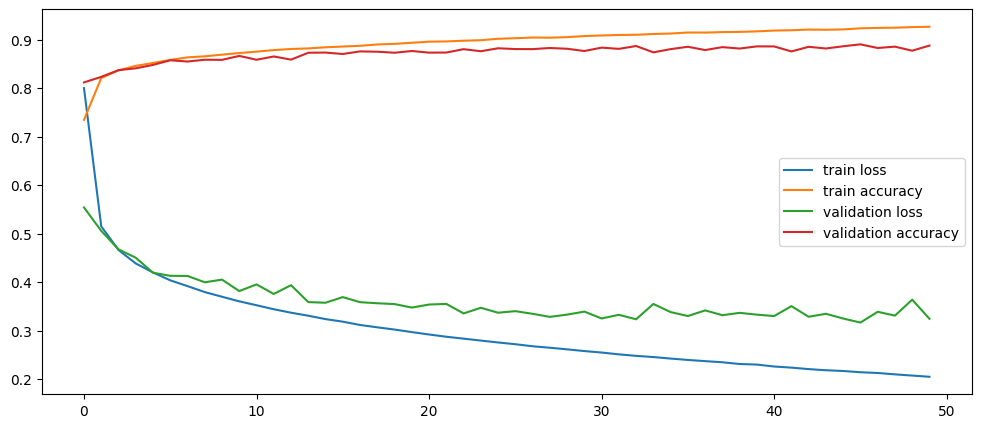

In [93]:
fig, ax= plt.subplots(figsize= (12,5))
ax.plot(history.history["loss"], label="train loss")
ax.plot(history.history["accuracy"], label= "train accuracy")
ax.plot(history.history["val_loss"],label= "validation loss")
ax.plot(history.history["val_accuracy"], label= "validation accuracy")
ax.legend()

# Model evaluation on test data

In [94]:
model.evaluate(x_test, y_test, verbose= 0)

[0.34232500195503235, 0.8815000057220459]

1. `model.evaluate(x_test, y_test, verbose= 0)`
   - `x_test` and `y_test` are the test data and their corresponding labels. This data is used to evaluate the model's performance after training.
   - The `evaluate` function computes the loss and any specified metrics for the model on the test dataset. This gives an indication of how well the model is expected to perform on new, unseen data.
   - `verbose=0` controls the verbosity mode. When `verbose` is set to 0, it means that the evaluation process will run silently without displaying any progress bar or messages.

In summary, `model.evaluate(x_test, y_test, verbose=0)` evaluates the trained model on the test dataset (`x_test`, `y_test`) and returns the loss value and any other metrics specified during `model.compile`. Setting `verbose` to 0 ensures that no output is displayed during the evaluation process.

# Model prediction

In [95]:
x3= x_test[1:3]

In [96]:
x3

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [97]:
x3.shape

(2, 28, 28)

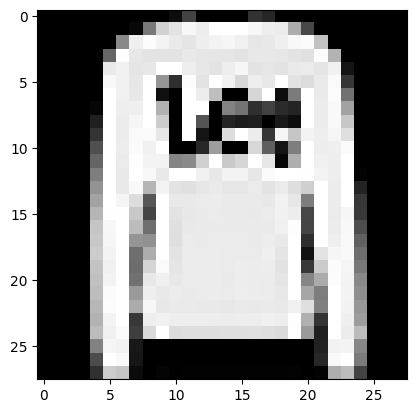

In [98]:
plt.imshow(x3[0], cmap= "gray")

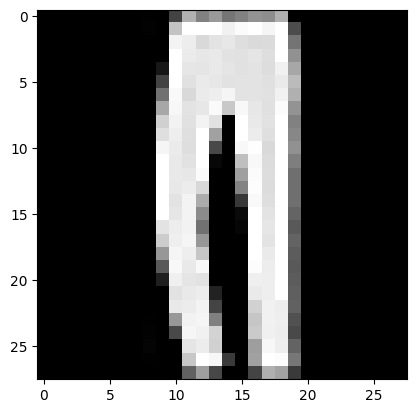

In [99]:
plt.imshow(x3[1], cmap= "gray")

In [100]:
model.predict(x3)

1/1 [==============================] - 0s 144ms/step


array([[8.7867414e-07, 5.4480201e-12, 9.7769916e-01, 1.2001448e-09,
        2.1363834e-02, 3.2440882e-13, 9.3612156e-04, 1.8894795e-09,
        5.3268157e-11, 4.6991122e-12],
       [1.5049251e-06, 9.9999845e-01, 1.7724867e-09, 3.9208796e-08,
        4.2887742e-09, 1.0443064e-14, 3.6265371e-09, 3.8315935e-12,
        1.1970573e-09, 3.4317518e-11]], dtype=float32)

In [101]:
model.predict(x3).shape

1/1 [==============================] - 0s 111ms/step


(2, 10)

### Model.predict(x3) is a 2 dimensional array and it emcompasses the probability scores of being class 0 to class 9 for each of the two samples. the class that has the highest score will be chosen

In [103]:
model.predict(x3).round(3)

1/1 [==============================] - 0s 22ms/step


array([[0.   , 0.   , 0.978, 0.   , 0.021, 0.   , 0.001, 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ]], dtype=float32)

In [105]:
np.argmax (model.predict(x3), axis= 1)

1/1 [==============================] - 0s 54ms/step


array([2, 1])

1. `model.predict(x3)`
   - `x3` is the input data for which you want to make predictions. This could be a single sample or a batch of samples.
   - The `predict` method generates output predictions for the input samples. For a classification model, these predictions are typically probabilities for each class.

2. `np.argmax(..., axis=1)`
   - `np.argmax` is a function from the NumPy library that returns the indices of the maximum values along a specified axis.
   - `axis=1` specifies that the function should find the index of the maximum value along the second axis (i.e., across the columns for each row). In the context of model predictions, this means it will find the class with the highest predicted probability for each sample.

Putting it all together, `np.argmax(model.predict(x3), axis=1)` performs the following steps:
1. `model.predict(x3)` generates the predicted probabilities for each class for each sample in `x3`.
2. `np.argmax(..., axis=1)` then finds the index of the class with the highest probability for each sample.

This results in an array of predicted class indices, where each index corresponds to the class with the highest predicted probability for each sample in `x3`.

For example, if `model.predict(x3)` returns:
```
[[0.1, 0.2, 0.7],
 [0.3, 0.4, 0.3],
 [0.8, 0.1, 0.1]]
```
Then `np.argmax(model.predict(x3), axis=1)` will return:
```
[2, 1, 0]
```
Indicating that the predicted classes for the three samples are 2, 1, and 0 respectively.

In [106]:
y_test[1:3]

array([2, 1], dtype=uint8)